# 課題3: クラスタリング

レッスン4・5で作成したプロ野球選手の推定年俸のデータを使ってクラスタリングを実行してみましょう。

レッスン8で学んだ内容を踏まえ、各セルに'#コメント'の内容を実行するコードを、コメントの下に記入してください。

わからない場合は、ここまでのレッスン内容や各種ライブラリの公式ドキュメントを参照しましょう。

## 1. 必要なモジュールの読み込み

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

## 2. データの読み込み

CSVファイル"baseball_salary.csv"を読み込み、内容を確認します。

In [2]:
# データ読み込み
dataset = pd.read_csv("baseball_salary.csv")

In [3]:
# データを最初の5行だけ表示
dataset.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,...,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,...,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,...,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,...,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,...,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,...,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [4]:
# 中身を'打率'と'打点'の列のみにする
dataset = dataset.loc[:, ['打率', '打点']]

# 先頭の5行だけ表示して確認
dataset.head()

,打率,打点
0,0.308,92
1,0.271,56
2,0.290,60
3,0.265,78
4,0.292,48


## 3. データの正規化

クラスタリングは類似度（距離）に基づいて行われるため、正規化は重要です。

ここでは、本編で紹介した *Min-max normalization* を使ってみましょう。自分でアルゴリズムを実装する必要はなく、`sklearn.preprocessing.MinMaxScaler()` を利用します。

参考：https://scikit-learn.org/0.19/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [5]:
# MinMaxScalerで正規化を実施
data_norm = MinMaxScaler().fit_transform(dataset)

In [6]:
# 正規化後のデータを確認（5行分だけ表示）
data_norm[0:4]

array([[0.616     , 0.87619048],
       [0.542     , 0.53333333],
       [0.58      , 0.57142857],
       [0.53      , 0.74285714]])

## 4. データの可視化

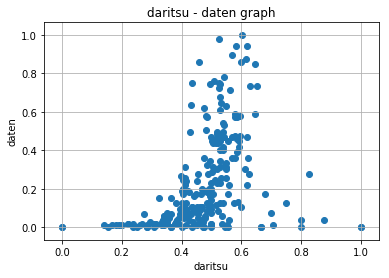

In [7]:
# 正規化後の打率と打点の散布図を描画する
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.scatter(data_norm[:,0], data_norm[:,1])
#fig.show()
#-----------------------------------------
plt.scatter(data_norm[:,0], data_norm[:,1])
plt.title("daritsu - daten graph")
plt.xlabel("daritsu")
plt.ylabel("daten")
plt.grid(True)

## 5. クラスター数の決定

k-平均法（K-means）を実行しましょう。

In [8]:
# 最大クラスター数を10としてWCSS値を取得
wcss = []
n_comps = np.arange(1, 11)

for k in n_comps:
    # KMeansの初期化。initはデフォルトで"k-means++"、n_initもデフォルトで10
    km = KMeans(n_clusters=k, init='k-means++', n_init=10).fit(data_norm)
    # inertia_属性に、WCSSの値が入っている
    wcss.append(km.inertia_)

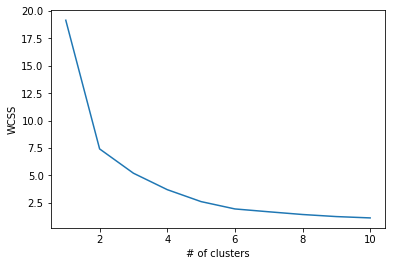

In [9]:
# 上記結果をplotにて可視化
fig = plt.figure(figsize=(6, 4))
plt.plot(n_comps, wcss)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()

## 6. 結果の確認

上記の結果を基に、クラスタ数6で再度クラスタリングを実行し、分類ごとに色を分けて散布図にプロットしましょう。

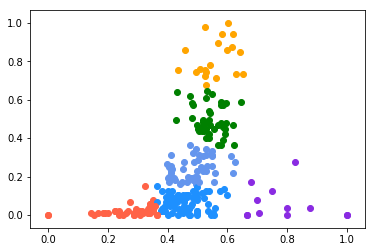

In [10]:
# 色の指定は以下の colors を利用してください
colors = ['dodgerblue', 'orange', 'green', 'tomato', 'blueviolet', 'cornflowerblue']

# 散布図にプロットする
km = KMeans(n_clusters=6, init='k-means++', n_init=10).fit(data_norm)

plt.figure()
for (i, label) in enumerate(km.labels_):
    if label == 0:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[0])
    elif label == 1:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[1])
    elif label == 2:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[2])
    elif label == 3:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[3])
    elif label == 4:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[4])
    elif label == 5:
        plt.scatter(data_norm[i, 0], data_norm[i, 1], c=colors[5])
plt.show()

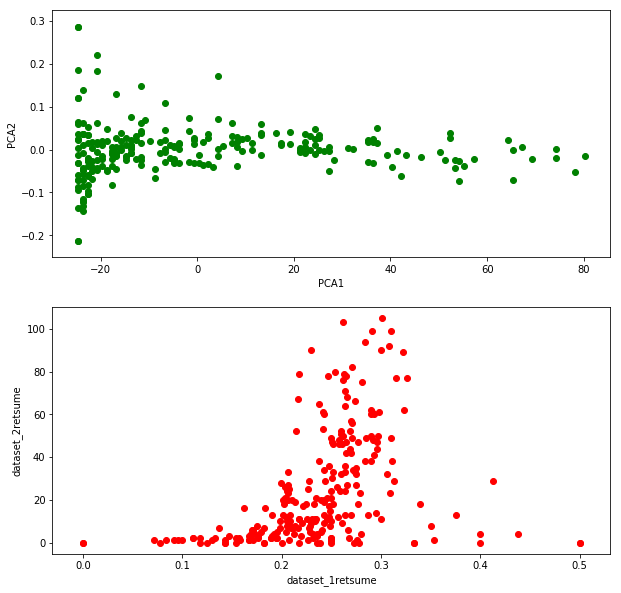

In [42]:
#yakyuu data
import sklearn.datasets as datasets
from sklearn.decomposition import PCA

# 色の指定は以下の colors を利用してください
#colors = ['dodgerblue', 'orange', 'green', 'tomato', 'blueviolet', 'cornflowerblue']

pca1 = PCA(n_components=2).fit_transform(dataset)
dataset_pd = np.array(dataset)

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(pca1[:,0],pca1[:,1], c='green')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(2, 1, 2)
plt.scatter(dataset_pd[:,0],dataset_pd[:,1], c='red')
plt.xlabel('dataset_1retsume')
plt.ylabel('dataset_2retsume')
plt.show()

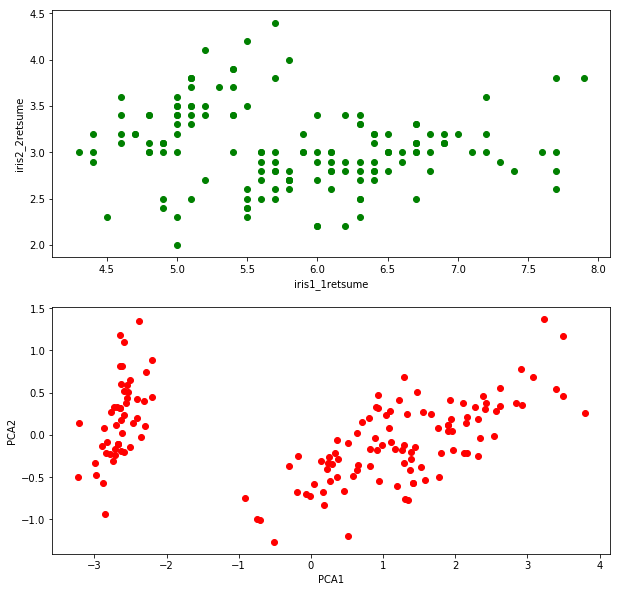

In [43]:
#iris data
import sklearn.datasets as datasets
iris = datasets.load_iris()

iris_pd = np.array(iris['data'])

pca = PCA(n_components=4).fit_transform(iris['data'])

plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(iris_pd[:,0],iris_pd[:,1], c='green')
plt.xlabel('iris1_1retsume')
plt.ylabel('iris2_2retsume')

plt.subplot(2, 1, 2)
plt.scatter(pca[:,0],pca[:,1], c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()